In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict
import copy

# Add the utils directory to the Python path and import utils
from utils import *
from MLPQLearningAgent import *
from OracleQLearningAgent import *
from TransitionModelLearner import *
from MLPQLearningAgentNotUseCondition import *


In [6]:
grid_world = GridWorld(
    n_rows=N_ROWS,
    n_cols=N_COLS,
    start=START,
    goal=GOAL,
    walls = WALLS,
    step_reward= -0.1,
    goal_reward=1,
    bump_reward=-0.2,
    gamma=0.95
)

def oracle_model(s, action):
    """Oracle model that predicts the next state for all 8 actions (including diagonal actions 4-7)"""
    s_model_next, r_model, done_model = grid_world.step(grid_world.from_index(s), action, ACTIONS_8)
    return s_model_next, r_model, done_model

In [7]:
  # 1. Q-learning with 4 actions
agent_plain_4_action = QLearningAgent(grid_world, 4, seed=42)
agent_plain_4_action.train(ACTIONS_4, epsilon_greedy)
results_plain = agent_plain_4_action.get_results(moving_average)

# ----------------------------------------
policy4 = Visualizer.derive_policy(agent_plain_4_action.Q, N_ROWS, N_COLS)
Visualizer.render_policy(policy4, N_ROWS, N_COLS, WALLS, START, GOAL)
Visualizer.print_value_grid(agent_plain_4_action.Q, N_ROWS, N_COLS)

# # 3. Oracle Q-learning with 5 actions 
# oracle_agent_run = OracleQLearningAgent(grid_world, len(ACTIONS_8),
#                                         base_q_table = copy.deepcopy(agent_plain_4_action.Q), seed=42
#                                         ,use_conditional=False)
# oracle_agent_run.train_with_oracle(ACTIONS_8, epsilon_greedy, oracle_model)
# oracle_results_run = oracle_agent_run.get_results(moving_average)
# # ----------------------------------------
# policy5 = Visualizer.derive_policy(oracle_agent_run.Q, N_ROWS, N_COLS)
# Visualizer.render_policy(policy5, N_ROWS, N_COLS, WALLS, START, GOAL)
# Visualizer.print_value_grid(oracle_agent_run.Q, N_ROWS, N_COLS)

Training (4 actions) complete!

Policy Visualization:
 →  ←  ←  ↓  ↓  →  ↓  ↑  ↑  ↓  →  ↓  ↓  ↓  →  →  →  ←  →  →  ↓  ↑  →  ↓  → 
 ↓  ↑  ←  →  ↑  →  ←  →  ↑  →  ↓  ↑  ↓  ↓  ←  ↑  ↑  ↓  →  ↓  →  ←  →  ↓  ↑ 
 ↓  ↓  ←  →  →  ↑  →  ↑  ↑  ↓  ↑  ←  →  →  ↑  ↑  →  →  →  ↓  ↓  ↓  →  →  ↑ 
 →  ↓  ↓  →  ↑  →  →  ←  ←  ↑  →  →  ↑  ↓  ↓  ←  →  ↓  →  ←  ↓  ←  ↓  ↓  ↓ 
 →  ↓  →  ↑  →  ↑  ↓  ←  →  ↑  ←  ←  ↓  ↑  ↑  ↓  →  ↑  ↑  ↓  ↓  →  ↓  ↓  ↓ 
 →  ↑  ↑  →  ↑  ←  ↓  →  →  ↓  ↑  ↓  ↑  →  ←  ←  →  ↑  ↓  ↓  →  →  →  ↓  ↓ 
 →  ↑  ↑  →  →  →  ↓  ↑  ↓  ←  ↑  →  ←  ↑  ↑  →  →  ↑  ↑  ↓  ←  ↑  ▓  ↓  ↓ 
 ↓  ↓  ↑  ←  ↑  →  ←  →  ↓  →  ↑  ↓  ↑  ←  →  ←  ←  →  ↓  ↑  ↑  ↑  ▓  ↓  ↓ 
 ↑  ↓  ↓  ↓  ↑  ↑  ←  ←  →  ↑  ↑  →  ↓  →  ↓  ↑  ↑  ←  ↑  ↓  ←  ↑  ▓  ↓  ↓ 
 ↓  ↓  ↑  →  →  →  ←  ↓  →  ↑  →  →  →  →  ↑  →  →  ↓  ←  ↓  →  ↑  ▓  ↓  ↓ 
 ↑  →  ↑  ←  ↑  ←  ←  ←  ↓  ↑  ←  ↑  ↑  ←  ↓  ↑  →  ↓  →  ↑  ←  →  ▓  ↓  ↓ 
 ↑  ↑  ←  →  ↑  ←  ↑  ↑  →  →  →  ↑  ↑  ←  ←  ↓  →  →  ↑  ↓  ←  ↑  ▓  →  ↓ 
 ↑  →  ←  ←  ←  ←  →  ↓  →  →  →  

Running multiple experiments for statistical analysis...
Running experiment 1/10...
Training (4 actions) complete!
Training (8 actions) complete!
Running experiment 2/10...
Training (4 actions) complete!
Training (8 actions) complete!
Running experiment 3/10...
Training (4 actions) complete!
Training (8 actions) complete!
Running experiment 4/10...
Training (4 actions) complete!
Training (8 actions) complete!
Running experiment 5/10...
Training (4 actions) complete!
Training (8 actions) complete!
Running experiment 6/10...
Training (4 actions) complete!
Training (8 actions) complete!
Running experiment 7/10...
Training (4 actions) complete!
Training (8 actions) complete!
Running experiment 8/10...
Training (4 actions) complete!
Training (8 actions) complete!
Running experiment 9/10...
Training (4 actions) complete!
Training (8 actions) complete!
Running experiment 10/10...
Training (4 actions) complete!
Training (8 actions) complete!


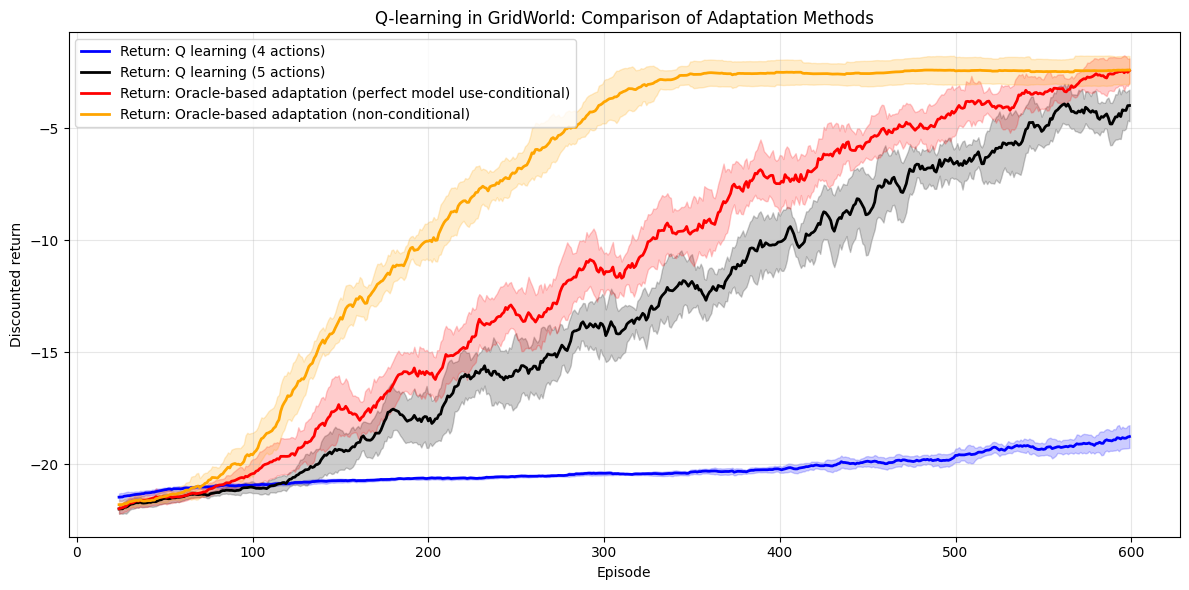

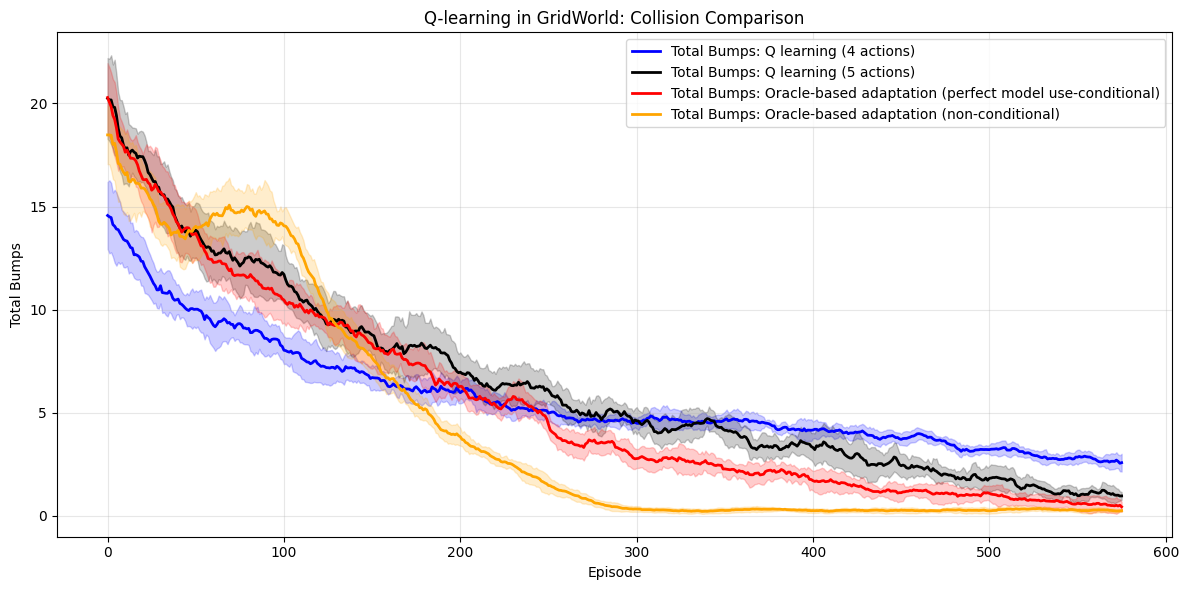

In [8]:
EPISODES = 600

def run_multiple_experiments(n_runs=5, base_seed=123):
    """Run multiple experiments with different seeds and return statistics"""
    
    # Storage for all runs
    all_returns4 = []
    all_returns5plain = []
    all_returns5oracle = []
    all_returns5mlp = []
    all_returns5mlp_no_cond = []
    all_bumps4 = []
    all_bumps5plain = []
    all_bumps5oracle = []
    all_bumps5mlp = []
    all_bumps5mlp_no_cond = []
    all_bumps5ignore = []
    
    for run in range(n_runs):
        current_seed = base_seed + run * 42
        # Reset random seeds
        rng = np.random.default_rng(current_seed)
        random.seed(current_seed)
        np.random.seed(current_seed)
        torch.manual_seed(current_seed)
        
        print(f"Running experiment {run + 1}/{n_runs}...")
        
        # 1. Q-learning with 4 actions
        agent_plain_4_action = QLearningAgent(grid_world = grid_world, n_actions= 4, episodes = EPISODES, seed=current_seed)
        agent_plain_4_action.train(ACTIONS_4, epsilon_greedy)
        results_plain = agent_plain_4_action.get_results(moving_average)
        all_returns4.append(results_plain['returns'])
        all_bumps4.append(results_plain['bumps'])
        
        # 4. MLP Q-learning with learned model (conditional)
        mlp_agent = MLPQLearningAgent(grid_world = grid_world, n_actions = len(ACTIONS_8), episodes = EPISODES,
                                      base_q_table=copy.deepcopy(agent_plain_4_action.Q), seed=current_seed)
        mlp_agent.train_with_learned_model(ACTIONS_8, epsilon_greedy)
        mlp_results = mlp_agent.get_results(moving_average)
        all_returns5mlp.append(mlp_results['returns'])
        all_bumps5mlp.append(mlp_results['bumps'])
        
        # 5. MLP Q-learning with learned model (non-conditional)
        mlp_agent_no_cond = OracleQLearningAgent(grid_world = grid_world, n_actions = len(ACTIONS_8),
                                                episodes = EPISODES, base_q_table=copy.deepcopy(agent_plain_4_action.Q),
                                                use_conditional=False,
                                                seed=current_seed)
        
        mlp_agent_no_cond.train_with_oracle(ACTIONS_8, epsilon_greedy, oracle_model)
        mlp_results_no_cond = mlp_agent_no_cond.get_results(moving_average)
        all_returns5mlp_no_cond.append(mlp_results_no_cond['returns'])
        all_bumps5mlp_no_cond.append(mlp_results_no_cond['bumps'])
        
        oracle_agent_run = OracleQLearningAgent(grid_world = grid_world, n_actions = len(ACTIONS_8),
                                                episodes = EPISODES, base_q_table=copy.deepcopy(agent_plain_4_action.Q),
                                                use_conditional=True,
                                                use_model=False,
                                                seed=current_seed)
        
        oracle_agent_run.train_with_oracle(ACTIONS_8, epsilon_greedy, oracle_model)
        oracle_results_run = oracle_agent_run.get_results(moving_average)
        all_returns5oracle.append(oracle_results_run['returns'])
        all_bumps5oracle.append(oracle_results_run['bumps'])
        
        agent_plain = QLearningAgent(grid_world = grid_world, n_actions = len(ACTIONS_8), episodes = EPISODES, seed=current_seed)
        agent_plain.train(ACTIONS_8, epsilon_greedy)
        results_plain = agent_plain.get_results(moving_average)
        all_returns5plain.append(results_plain['returns'])
        all_bumps5plain.append(results_plain['bumps'])
        
    # Calculate statistics
    all_returns4 = np.array(all_returns4)
    all_returns5plain = np.array(all_returns5plain)
    all_returns5oracle = np.array(all_returns5oracle)
    all_returns5mlp = np.array(all_returns5mlp)
    all_returns5mlp_no_cond = np.array(all_returns5mlp_no_cond)
    all_bumps4 = np.array(all_bumps4)
    all_bumps5plain = np.array(all_bumps5plain)
    all_bumps5oracle = np.array(all_bumps5oracle)
    all_bumps5mlp = np.array(all_bumps5mlp)
    all_bumps5mlp_no_cond = np.array(all_bumps5mlp_no_cond)
    all_bumps5ignore = np.array(all_bumps5ignore)
    
    # Calculate moving averages for all runs
    ma_w = 25
    all_ret_ma4 = np.array([moving_average(returns, w=ma_w) for returns in all_returns4])
    all_ret_ma5plain = np.array([moving_average(returns, w=ma_w) for returns in all_returns5plain])
    all_ret_ma5oracle = np.array([moving_average(returns, w=ma_w) for returns in all_returns5oracle])
    all_ret_ma5mlp = np.array([moving_average(returns, w=ma_w) for returns in all_returns5mlp])
    all_ret_ma5mlp_no_cond = np.array([moving_average(returns, w=ma_w) for returns in all_returns5mlp_no_cond])
    
    all_bumps4_avg = np.array([moving_average(bumps, w=ma_w) for bumps in all_bumps4])
    all_bumps5plain_avg = np.array([moving_average(bumps, w=ma_w) for bumps in all_bumps5plain])
    all_bumps5oracle_avg = np.array([moving_average(bumps, w=ma_w) for bumps in all_bumps5oracle])
    all_bumps5mlp_avg = np.array([moving_average(bumps, w=ma_w) for bumps in all_bumps5mlp])
    all_bumps5mlp_no_cond_avg = np.array([moving_average(bumps, w=ma_w) for bumps in all_bumps5mlp_no_cond])
    
    return {
        'returns': {
            '4_actions': {'mean': np.mean(all_ret_ma4, axis=0), 'std': np.std(all_ret_ma4, axis=0)},
            '5_plain': {'mean': np.mean(all_ret_ma5plain, axis=0), 'std': np.std(all_ret_ma5plain, axis=0)},
            '5_oracle': {'mean': np.mean(all_ret_ma5oracle, axis=0), 'std': np.std(all_ret_ma5oracle, axis=0)},
            '5_mlp': {'mean': np.mean(all_ret_ma5mlp, axis=0), 'std': np.std(all_ret_ma5mlp, axis=0)},
            '5_mlp_no_cond': {'mean': np.mean(all_ret_ma5mlp_no_cond, axis=0), 'std': np.std(all_ret_ma5mlp_no_cond, axis=0)},
        },
        'bumps': {
            '4_actions': {'mean': np.mean(all_bumps4_avg, axis=0), 'std': np.std(all_bumps4_avg, axis=0)},
            '5_plain': {'mean': np.mean(all_bumps5plain_avg, axis=0), 'std': np.std(all_bumps5plain_avg, axis=0)},
            '5_oracle': {'mean': np.mean(all_bumps5oracle_avg, axis=0), 'std': np.std(all_bumps5oracle_avg, axis=0)},
            '5_mlp': {'mean': np.mean(all_bumps5mlp_avg, axis=0), 'std': np.std(all_bumps5mlp_avg, axis=0)},
            '5_mlp_no_cond': {'mean': np.mean(all_bumps5mlp_no_cond_avg, axis=0), 'std': np.std(all_bumps5mlp_no_cond_avg, axis=0)},
        }
    }

# Run multiple experiments
print("Running multiple experiments for statistical analysis...")
stats = run_multiple_experiments(n_runs=10)  # Reduced runs for faster execution

# Plot results with shaded error bars
def plot_with_shaded_errors(stats, figsize=(12, 6)):
    """Plot results with shaded error bars"""
    
    # Returns plot
    plt.figure(figsize=figsize)
    
    # Calculate x-axis for each series (they might have different lengths due to moving average)
    episodes_total = EPISODES
    ma_w = 25
    
    # Plot each method with shaded error bars
    methods = [
        ('4_actions', 'Q learning (4 actions)', 'blue'),
        ('5_plain', 'Q learning (5 actions)', 'black'), 
        ('5_oracle', 'Oracle-based adaptation (perfect model use-conditional)', 'red'),
        ('5_mlp_no_cond', 'Oracle-based adaptation (non-conditional)', 'orange'),
        # ('5_mlp', 'MLP-based adaptation (learned model)', 'green'),
    ]
    
    for method_key, label, color in methods:
        mean_vals = stats['returns'][method_key]['mean']
        std_vals = stats['returns'][method_key]['std']
        x_vals = np.arange(episodes_total - len(mean_vals), episodes_total)
        
        # Plot mean line
        plt.plot(x_vals, mean_vals, color=color, label=f'Return: {label}', linewidth=2)
        
        # Plot shaded error region (mean ± std)
        plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, 
                        color=color, alpha=0.2)
    
    plt.xlabel('Episode')
    plt.ylabel('Discounted return')
    plt.title('Q-learning in GridWorld: Comparison of Adaptation Methods')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Bumps plot
    plt.figure(figsize=figsize)
    
    for method_key, label, color in methods:
        mean_vals = stats['bumps'][method_key]['mean']
        std_vals = stats['bumps'][method_key]['std']
        x_vals = np.arange(len(mean_vals))
        
        # Plot mean line
        plt.plot(x_vals, mean_vals, color=color, label=f'Total Bumps: {label}', linewidth=2)
        
        # Plot shaded error region (mean ± std)
        plt.fill_between(x_vals, mean_vals - std_vals, mean_vals + std_vals, 
                        color=color, alpha=0.2)
    
    plt.xlabel('Episode')
    plt.ylabel('Total Bumps')
    plt.title('Q-learning in GridWorld: Collision Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot the results with shaded error bars
plot_with_shaded_errors(stats)